In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
 # Declare a Base using `automap_base()`
Base = automap_base()

# reflect an existing database into a new model
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurements = Base.classes.measurement

stations = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
#Inspect tables in database, to collect column metadata.
#Create inspector and connecting it to the engine object
inspector = inspect(engine)

#Inspect columns in 'measurements' table
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
#Inspect columns in 'station' table
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
#https://stackoverflow.com/questions/4186062/sqlalchemy-order-by-descending
mostRecentDate = session.query(measurements.date).order_by(measurements.date.desc()).first()[0]
print(mostRecentDate)

2017-08-23


In [87]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. Convert str date to datetime object.
#https://www.geeksforgeeks.org/python-datetime-strptime-function/
latestDateObj = datetime.strptime(mostRecentDate.replace("-","/"),"%Y/%m/%d")

# Calculate the date one year from the last date in data set.
#https://www.geeksforgeeks.org/how-to-add-and-subtract-days-using-datetime-in-python/
latestDateMinusOneYear = latestDateObj - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = session.query(measurements.date,measurements.prcp).filter(measurements.date >= latestDateMinusOneYear).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(data, columns=['Date','Precipitation']).dropna()

# Sort the dataframe by date
prcp_df.sort_values(by = 'Date')

#all_dates = prcp_df['Date'].to_list()

prcp_df.set_index('Date',inplace=True)



In [60]:
all_dates = (prcp_df.index).to_list()

In [62]:
all_dates

['2016-08-24',
 '2016-08-25',
 '2016-08-26',
 '2016-08-27',
 '2016-08-28',
 '2016-08-29',
 '2016-08-30',
 '2016-08-31',
 '2016-09-01',
 '2016-09-02',
 '2016-09-03',
 '2016-09-04',
 '2016-09-07',
 '2016-09-08',
 '2016-09-09',
 '2016-09-10',
 '2016-09-11',
 '2016-09-12',
 '2016-09-13',
 '2016-09-14',
 '2016-09-15',
 '2016-09-16',
 '2016-09-17',
 '2016-09-18',
 '2016-09-19',
 '2016-09-20',
 '2016-09-21',
 '2016-09-22',
 '2016-09-23',
 '2016-09-24',
 '2016-09-25',
 '2016-09-26',
 '2016-09-27',
 '2016-09-28',
 '2016-09-29',
 '2016-09-30',
 '2016-10-01',
 '2016-10-02',
 '2016-10-03',
 '2016-10-04',
 '2016-10-05',
 '2016-10-06',
 '2016-10-07',
 '2016-10-08',
 '2016-10-09',
 '2016-10-10',
 '2016-10-11',
 '2016-10-12',
 '2016-10-13',
 '2016-10-14',
 '2016-10-15',
 '2016-10-16',
 '2016-10-17',
 '2016-10-18',
 '2016-10-19',
 '2016-10-20',
 '2016-10-21',
 '2016-10-22',
 '2016-10-23',
 '2016-10-24',
 '2016-10-25',
 '2016-10-26',
 '2016-10-27',
 '2016-10-28',
 '2016-10-29',
 '2016-10-30',
 '2016-10-

In [89]:
#create xtick lists using 155 as a factor for 2015 (count of date values in dataframe) for even x-axis lable spacing.
x_tickVal = [d for n, d in enumerate(all_dates) if n%155==0]
x_locVal = [n for n, d in enumerate(all_dates) if n%155==0]

In [75]:
print(x_locVal)

[0, 155, 310, 465, 620, 775, 930, 1085, 1240, 1395, 1550, 1705, 1860]


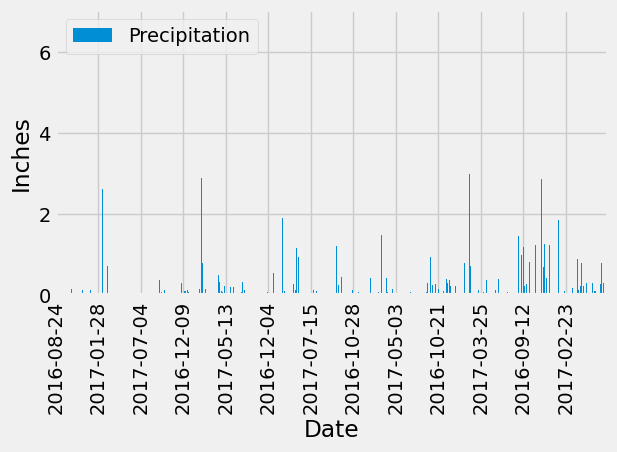

In [90]:
# Use Pandas Plotting with Matplotlib to plot the data
#plt.plot(prcp_df)
prcp_df.plot.bar()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(x_locVal,x_tickVal, rotation=90)
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

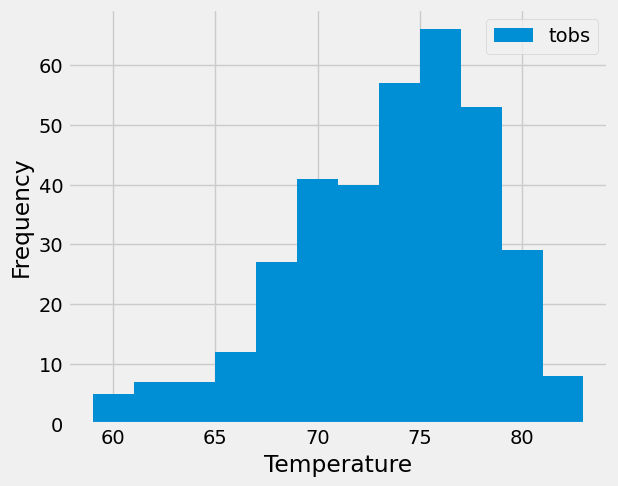

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [41]:
# Close Session
session.close()